# Ethics attitudes
This notebook is for analyzing the data regarding ethics attitudes. 

In [60]:
import pandas as pd
import numpy as np
from scipy import stats
import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns
import plot_likert
import starbars 

import os
import sys
from IPython.display import display, HTML

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

from scripts import utils

plot_likert.__internal__.BAR_LABEL_FORMAT = "%.1f" # plotting shows % with 2 decimals

In [61]:
# Vars
courses_cg = ["COMP202", "COMP250"]
courses_ee = ["COMP251", "COMP424", "COMP551"]
courses = courses_cg + courses_ee

deg_type = ["Undergraduate", "Graduate"]
years = ["U0", "U1", "U2", "U3", "U4+", "M1", "M2", "M3+", "PhD1", "PhD2", "PhD3", "PhD4", "PhD5+"]
majors = ["CS/SWE major", "CS/SWE minor", "Other"]
genders = ["Man", "Woman", "Other", "Prefer not to answer"]
minorities = ["Yes", "No", "Prefer not to answer"]
age = ["<18", "18-24", "25-34", "35-44", ">45", "Prefer not to answer"]
ethics_knowledge = ["Yes", "No"]
likert = range(1, 8)
likert_values = ["Strongly Disagree", "Disagree", "Somewhat Disagree", "Neutral", "Somewhat Agree", "Agree", "Strongly Agree"]
attitudes = ["Interest", "Value", "Self-efficacy", "Responsibility"]

# current semester (for script purposes)
semester = "F2025"

In [62]:
data_dir = os.path.join(project_root, 'data')

ee_file = "F2025_ee_clean.csv"
cg_file = "F2025_cg_clean.csv"

ee_data_path = os.path.join(data_dir, 'clean', ee_file)
cg_data_path = os.path.join(data_dir, 'clean', cg_file)

In [63]:
ee_data_full = pd.read_csv(ee_data_path, header=[0,1], index_col=0)
# remove rows with students who did not attend EE
ee_data = ee_data_full[ee_data_full["EE course"]["None"] == 0]

cg_data = pd.read_csv(cg_data_path, header=[0,1], index_col=0)
data_all = [ee_data, cg_data]

# rebuild the multiindexing properly to make data access easier
for d in data_all:
    utils.rebuild_multiindex(d)

In [64]:
course_data = {}
for course in courses:
    if course in courses_ee:
        course_data[course] = ee_data[ee_data["EE course"][course] == 1]

        # TODO: test this
        if course in cg_data["EE course"].columns:
            course_data[course] = pd.concat([course_data[course], cg_data[cg_data["EE course"][course] == 1]])
    else:
        course_data[course] = cg_data[cg_data["CG course"][course] == 1]
        
course_data["None"] = ee_data_full[ee_data_full["EE course"]["None"] == 1]

## Interest
### Interest questions EE vs CG

c:\Users\Etomiuk\OneDrive\OneNote\EE_data_analysis\analysis-embedded-ethics\venv\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
c:\Users\Etomiuk\OneDrive\OneNote\EE_data_analysis\analysis-embedded-ethics\venv\Lib\site-packages\plot_likert\plot_likert.py:310: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses_to_first_question = responses_per_question[0]
c:\Users\Etomiuk\OneDrive\OneNote\EE_data_analysis\analysis-embedded-ethics\venv\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
c:\Users\Etomiuk\OneDrive\OneNote\EE_data_analysis\analysis-embedded-ethics\venv\Lib\site-packages\plot_l

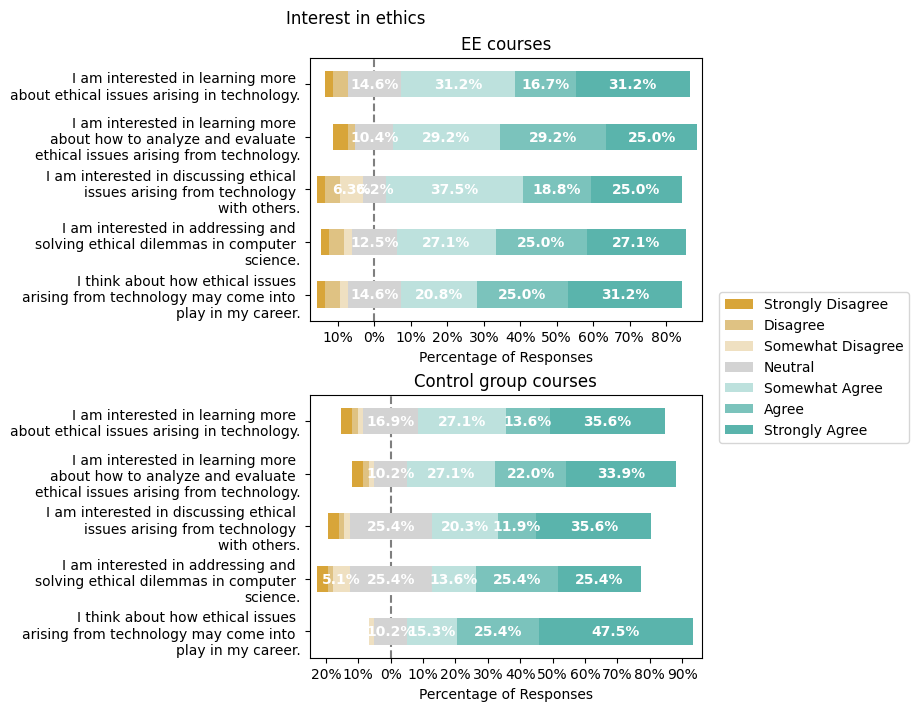

In [65]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 7), constrained_layout=True, sharey=True) # draw two plots in one row, two columns

plot_likert.plot_likert(ee_data["Interest"], likert, plot_percentage=True, colors=plot_likert.colors.likert7, bar_labels=True, ax=ax1, legend=False)
plot_likert.plot_likert(cg_data["Interest"], likert, plot_percentage=True, colors=plot_likert.colors.likert7, bar_labels=True, ax=ax2, legend=False)

fig.suptitle("Interest in ethics")
ax1.set_title("EE courses")
ax2.set_title("Control group courses")

ax1.set_yticklabels(["I am interested in learning more \nabout ethical issues arising in technology.",
                     "I am interested in learning more \nabout how to analyze and evaluate \nethical issues arising from technology.",
                     "I am interested in discussing ethical \nissues arising from technology \nwith others.",
                     "I am interested in addressing and \nsolving ethical dilemmas in computer \nscience.",
                     "I think about how ethical issues \narising from technology may come into \nplay in my career."][::-1])
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, likert_values, bbox_to_anchor=(1.3, 0.6))

## Value
### Value questions EE vs CG

c:\Users\Etomiuk\OneDrive\OneNote\EE_data_analysis\analysis-embedded-ethics\venv\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
c:\Users\Etomiuk\OneDrive\OneNote\EE_data_analysis\analysis-embedded-ethics\venv\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)


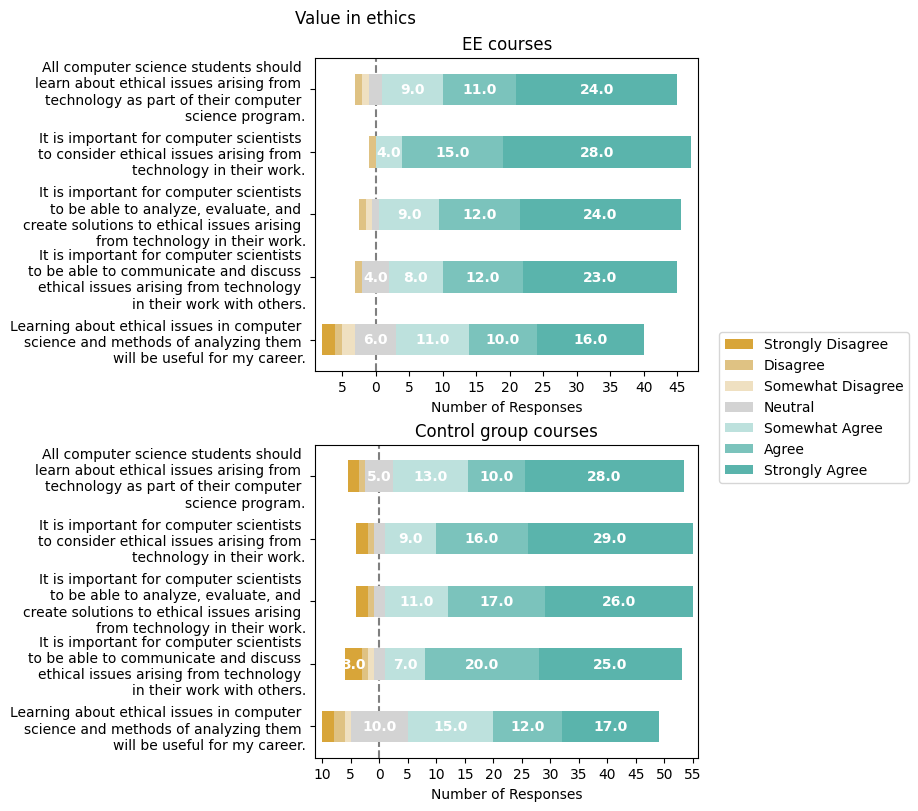

In [66]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 8), constrained_layout=True, sharey=True) # draw two plots in one row, two columns

plot_likert.plot_likert(ee_data["Value"], likert, colors=plot_likert.colors.likert7, bar_labels=True, ax=ax1, legend=False)
plot_likert.plot_likert(cg_data["Value"], likert,colors=plot_likert.colors.likert7, bar_labels=True, ax=ax2, legend=False)

fig.suptitle("Value in ethics")
ax1.set_title("EE courses")
ax2.set_title("Control group courses")

ax1.set_yticklabels(["All computer science students should \nlearn about ethical issues arising from \ntechnology as part of their computer \nscience program.",
                     "It is important for computer scientists \nto consider ethical issues arising from \ntechnology in their work.",
                     "It is important for computer scientists \nto be able to analyze, evaluate, and \ncreate solutions to ethical issues arising \nfrom technology in their work.",
                     "It is important for computer scientists \nto be able to communicate and discuss \nethical issues arising from technology \nin their work with others.",
                     "Learning about ethical issues in computer \nscience and methods of analyzing them \nwill be useful for my career."][::-1])
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, likert_values, bbox_to_anchor=(1.3, 0.6))

## Self-efficacy
### Self-efficacy questions EE vs CG

c:\Users\Etomiuk\OneDrive\OneNote\EE_data_analysis\analysis-embedded-ethics\venv\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
c:\Users\Etomiuk\OneDrive\OneNote\EE_data_analysis\analysis-embedded-ethics\venv\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)


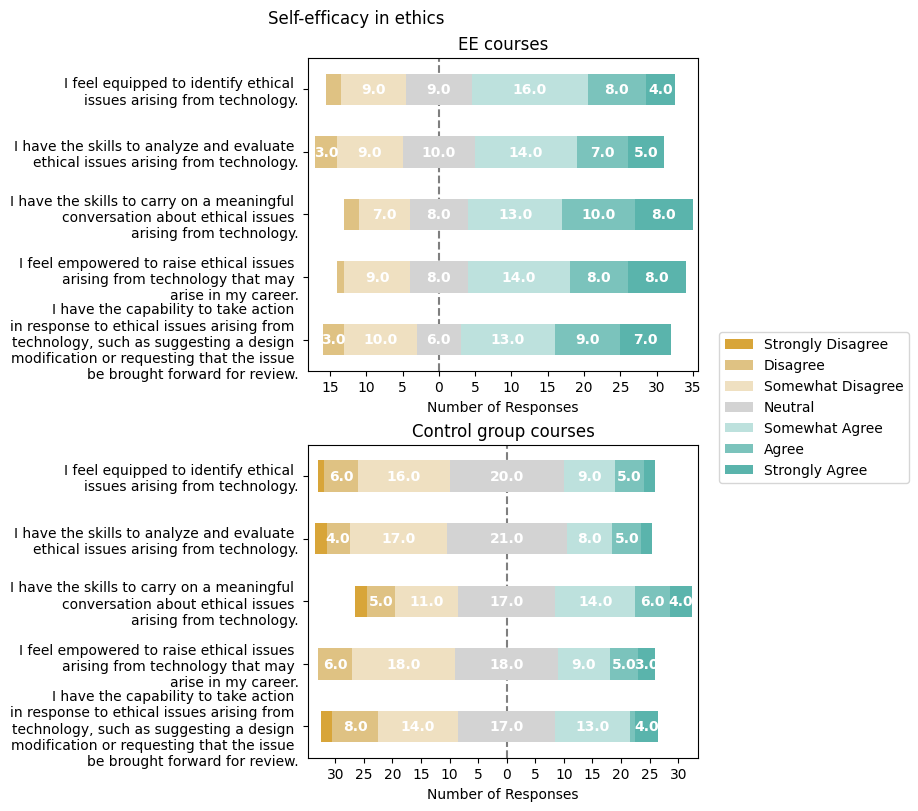

In [67]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 8), constrained_layout=True, sharey=True) # draw two plots in one row, two columns

plot_likert.plot_likert(ee_data["Self-efficacy"], likert, colors=plot_likert.colors.likert7, bar_labels=True, ax=ax1, legend=False)
plot_likert.plot_likert(cg_data["Self-efficacy"], likert,colors=plot_likert.colors.likert7, bar_labels=True, ax=ax2, legend=False)

fig.suptitle("Self-efficacy in ethics")
ax1.set_title("EE courses")
ax2.set_title("Control group courses")

ax1.set_yticklabels(["I feel equipped to identify ethical \nissues arising from technology.",
                     "I have the skills to analyze and evaluate \nethical issues arising from technology.",
                     "I have the skills to carry on a meaningful \nconversation about ethical issues \narising from technology.",
                     "I feel empowered to raise ethical issues \narising from technology that may \narise in my career.",
                     "I have the capability to take action \nin response to ethical issues arising from \ntechnology, such as suggesting a design \nmodification or requesting that the issue \nbe brought forward for review."][::-1])
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, likert_values, bbox_to_anchor=(1.3, 0.6))

## Responsibility
### Responsibility questions EE vs CG

c:\Users\Etomiuk\OneDrive\OneNote\EE_data_analysis\analysis-embedded-ethics\venv\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
c:\Users\Etomiuk\OneDrive\OneNote\EE_data_analysis\analysis-embedded-ethics\venv\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)


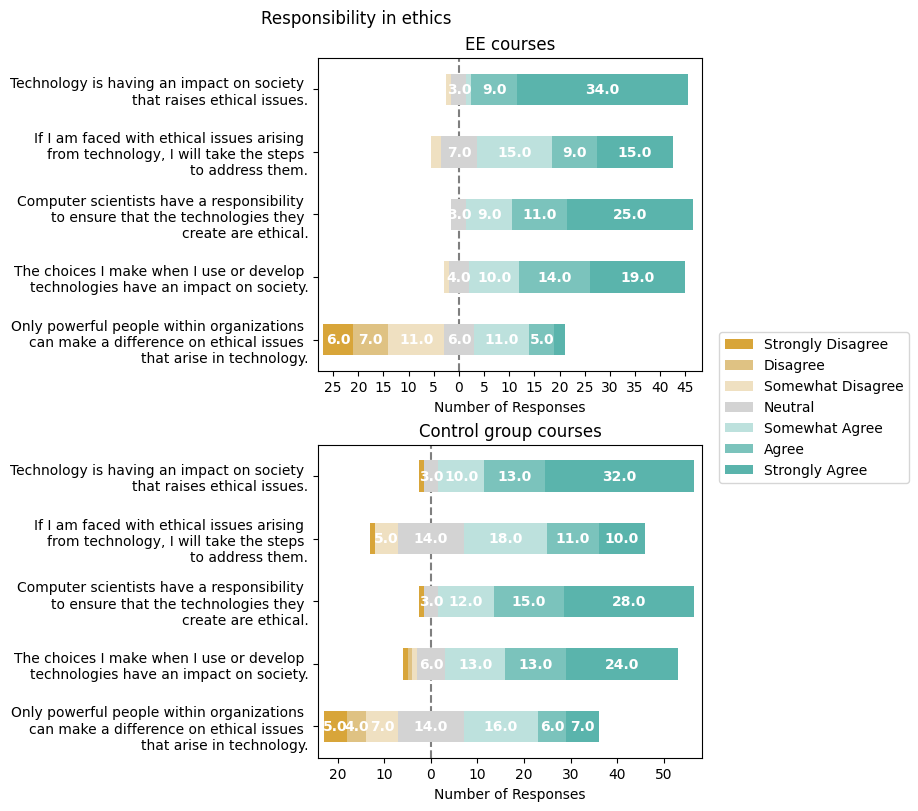

In [68]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 8), constrained_layout=True, sharey=True) # draw two plots in one row, two columns

plot_likert.plot_likert(ee_data["Responsibility"], likert, colors=plot_likert.colors.likert7, bar_labels=True, ax=ax1, legend=False)
plot_likert.plot_likert(cg_data["Responsibility"], likert,colors=plot_likert.colors.likert7, bar_labels=True, ax=ax2, legend=False)

fig.suptitle("Responsibility in ethics")
ax1.set_title("EE courses")
ax2.set_title("Control group courses")

ax1.set_yticklabels(["Technology is having an impact on society \nthat raises ethical issues.",
                     "If I am faced with ethical issues arising \nfrom technology, I will take the steps \nto address them.",
                     "Computer scientists have a responsibility \nto ensure that the technologies they \ncreate are ethical.",
                     "The choices I make when I use or develop \ntechnologies have an impact on society.",
                     "Only powerful people within organizations \ncan make a difference on ethical issues \nthat arise in technology."][::-1])
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, likert_values, bbox_to_anchor=(1.3, 0.6))

## Average per attitude EE vs CG

#### T-test
Testing for significant differences in attitudes between EE and controls

In [69]:
interest_avg_ee = ee_data["Interest"].mean(axis=1)
value_avg_ee = ee_data["Value"].mean(axis=1)
se_avg_ee = ee_data["Self-efficacy"].mean(axis=1)
responsibility_avg_ee = ee_data["Responsibility"].mean(axis=1)
ee_avgs = {"Interest": interest_avg_ee, 
           "Value": value_avg_ee, 
           "Self-efficacy": se_avg_ee, 
           "Responsibility": responsibility_avg_ee} # average per person

interest_avg_cg = pd.concat([cg_data["Interest"], ee_data_full[ee_data_full["EE course"]["None"] == 1]["Interest"]], axis=0).mean(axis=1)
value_avg_cg = pd.concat([cg_data["Value"], ee_data_full[ee_data_full["EE course"]["None"] == 1]["Value"]], axis=0).mean(axis=1)
se_avg_cg = pd.concat([cg_data["Self-efficacy"], ee_data_full[ee_data_full["EE course"]["None"] == 1]["Self-efficacy"]], axis=0).mean(axis=1)
responsibility_avg_cg = pd.concat([cg_data["Responsibility"], ee_data_full[ee_data_full["EE course"]["None"] == 1]["Responsibility"]], axis=0).mean(axis=1)
cg_avgs = {"Interest": interest_avg_cg, 
           "Value": value_avg_cg, 
           "Self-efficacy": se_avg_cg, 
           "Responsibility": responsibility_avg_cg} # average per person

Test for normality

In [70]:
for attitude in ee_avgs:
    norm_stat_ee, p_stat_ee = stats.normaltest(ee_avgs[attitude])
    norm_stat_cg, p_stat_cg = stats.normaltest(cg_avgs[attitude])
    print(f"Normality test for {attitude}: EE group - statistic = {norm_stat_ee}, p-value = {p_stat_ee}")
    print(f"Normality test for {attitude}: CG group - statistic = {norm_stat_cg}, p-value = {p_stat_cg}")

Normality test for Interest: EE group - statistic = 13.21894731270232, p-value = 0.001347541232554205
Normality test for Interest: CG group - statistic = 5.1406009150980605, p-value = 0.07651255319578697
Normality test for Value: EE group - statistic = 22.060602274583495, p-value = 1.6203210808779857e-05
Normality test for Value: CG group - statistic = 35.55586029680218, p-value = 1.901704511931576e-08
Normality test for Self-efficacy: EE group - statistic = 4.144803385270275, p-value = 0.12588308587912556
Normality test for Self-efficacy: CG group - statistic = 2.9898808153541516, p-value = 0.22426196862399256
Normality test for Responsibility: EE group - statistic = 2.3832721977551126, p-value = 0.30372393494877997
Normality test for Responsibility: CG group - statistic = 18.915292310097257, p-value = 7.809018704459851e-05


In [71]:
for attitude in ee_avgs:
    t_stat, p_stat = stats.ttest_ind(ee_avgs[attitude], cg_avgs[attitude])
    pg_stats = pg.ttest(ee_avgs[attitude], cg_avgs[attitude])
    print(f"T-test for {attitude}")
    display(pg_stats)

T-test for Interest


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.232101,98.118677,two-sided,0.816943,"[-0.54, 0.43]",0.044825,0.208,0.056184


T-test for Value


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.098876,108.977617,two-sided,0.274244,"[-0.2, 0.68]",0.203355,0.348,0.183267


T-test for Self-efficacy


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.593016,95.328778,two-sided,0.000519,"[0.36, 1.25]",0.698383,53.929,0.950829


T-test for Responsibility


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.779561,108.941736,two-sided,0.43734,"[-0.19, 0.44]",0.144427,0.266,0.116005


In [72]:
# calculate averages for plotting
ee_avgs_mean = []
ee_std = []
cg_avgs_mean = []
cg_std = []
attitudes = []

for attitude in ee_avgs:
    ee_avgs_mean.append(ee_avgs[attitude].mean())
    ee_std.append(ee_avgs[attitude].std())
    cg_avgs_mean.append(cg_avgs[attitude].mean())
    cg_std.append(cg_avgs[attitude].std())
    attitudes.append(attitude)

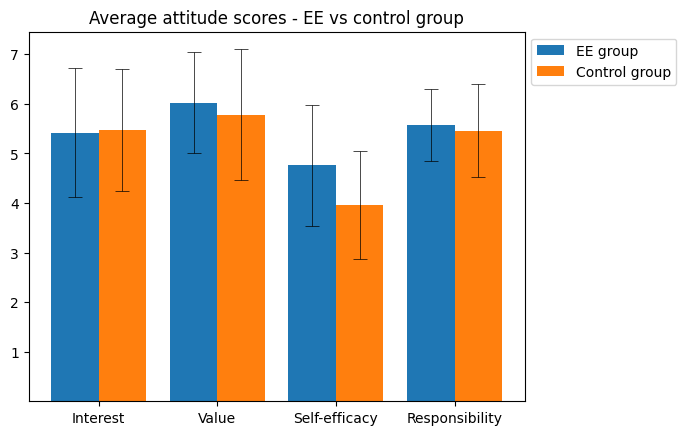

In [73]:
bar_width = 0.4
coords_ee = np.arange(4)
coords_cg = [x + bar_width for x in coords_ee]

fig = plt.subplots()
plt.bar(coords_ee, ee_avgs_mean, width=bar_width, label="EE group",yerr=ee_std, capsize=5, 
            error_kw={'elinewidth':0.5, 'capthick':0.5})
plt.bar(coords_cg, cg_avgs_mean, width=bar_width, label="Control group",yerr=cg_std, capsize=5,
            error_kw={'elinewidth':0.5, 'capthick':0.5})

plt.yticks(range(1, 8))
plt.xticks(coords_ee + bar_width/2, attitudes)
plt.title('Average attitude scores - EE vs control group')
plt.legend(loc='upper right', bbox_to_anchor=(1.32, 1))
plt.show()


## Comparison with UofT

Comparision with [2022 paper](https://doi.org/10.1145/3478431.3499407). 

In [74]:
mcgill_ee_data_2022 = pd.concat([ee_data["Interest"][["Q1", "Q5"]], ee_data["Self-efficacy"][["Q1", "Q3", "Q4", "Q5"]]], axis=1)
mcgill_cg_data_2022 = pd.concat([cg_data["Interest"][["Q1", "Q5"]], cg_data["Self-efficacy"][["Q1", "Q3", "Q4", "Q5"]]], axis=1)

mcgill_ee_avg_2022 = mcgill_ee_data_2022.sum(axis=1).mean()
mcgill_cg_avg_2022 = mcgill_cg_data_2022.sum(axis=1).mean()

mcgill_ee_std_2022 = mcgill_ee_data_2022.sum(axis=1).std()
mcgill_cg_std_2022 = mcgill_cg_data_2022.sum(axis=1).std()

# post data for UofT
uoft_ee_avg_2022 = 32.39
uoft_cg_avg_2022 = 28.21

uoft_ee_std_2022 = 5.87
uoft_cg_std_2022 = 7.15

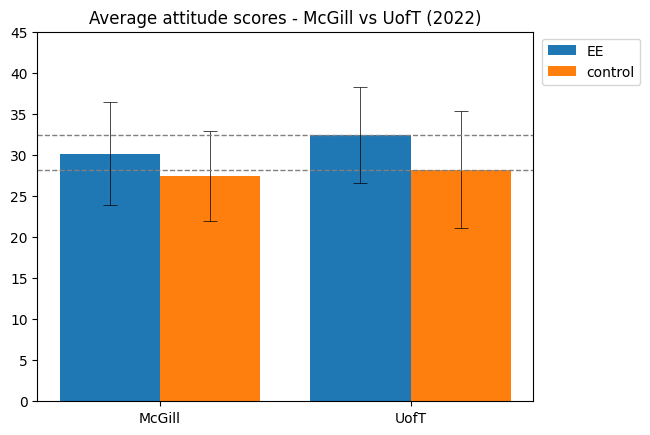

In [75]:
bar_width = 0.4
coords_mcgill = np.arange(2)
coords_uoft = [x + bar_width for x in coords_mcgill]

fig = plt.subplots()
plt.bar(coords_mcgill, [mcgill_ee_avg_2022, uoft_ee_avg_2022], width=bar_width, label="EE", yerr=[mcgill_ee_std_2022, uoft_ee_std_2022], capsize=5,
            error_kw={'elinewidth':0.5, 'capthick':0.5})
plt.bar(coords_uoft, [mcgill_cg_avg_2022, uoft_cg_avg_2022], width=bar_width, label="control",yerr=[mcgill_cg_std_2022, uoft_cg_std_2022], capsize=5,
            error_kw={'elinewidth':0.5, 'capthick':0.5})

plt.axhline(y=uoft_ee_avg_2022, linewidth=1, linestyle='dashed', color='grey')
plt.axhline(y=uoft_cg_avg_2022, linewidth=1, linestyle='dashed', color='grey')

plt.yticks(range(0, 46, 5))
plt.xticks(coords_mcgill + bar_width/2, ["McGill", "UofT"])
plt.title('Average attitude scores - McGill vs UofT (2022)')
plt.legend(loc='upper right', bbox_to_anchor=(1.23, 1))
plt.show()


Does McGill have a statistically significant difference between EE and CG group?

In [76]:
pg_stats = pg.ttest(mcgill_ee_data_2022.sum(axis=1), mcgill_cg_data_2022.sum(axis=1))
print(f"T-test for EASE")
display(pg_stats)

T-test for EASE


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.380097,93.30499,two-sided,0.019342,"[0.45, 5.03]",0.469813,2.491,0.668189


Comparison with 2023 paper.

In [77]:
mcgill_ee_attitude_data_2023 = pd.concat([ee_data["Interest"][["Q1", "Q5"]], ee_data["Value"][["Q1", "Q2"]], ee_data["Responsibility"][["Q1"]]], axis=1)
mcgill_cg_attitude_data_2023 = pd.concat([cg_data["Interest"][["Q1", "Q5"]], cg_data["Value"][["Q1", "Q2"]], cg_data["Responsibility"][["Q1"]]], axis=1)
mcgill_ee_se_data_2023 = ee_data["Self-efficacy"][["Q1", "Q3", "Q4", "Q5"]]
mcgill_cg_se_data_2023 = cg_data["Self-efficacy"][["Q1", "Q3", "Q4", "Q5"]]

mcgill_ee_attitude_avg_2023 = mcgill_ee_attitude_data_2023.sum(axis=1).mean()
mcgill_cg_attitude_avg_2023 = mcgill_cg_attitude_data_2023.sum(axis=1).mean()
mcgill_ee_se_avg_2023 = mcgill_ee_se_data_2023.sum(axis=1).mean()
mcgill_cg_se_avg_2023 = mcgill_cg_se_data_2023.sum(axis=1).mean()

mcgill_ee_attitude_std_2023 = mcgill_ee_attitude_data_2023.sum(axis=1).std()
mcgill_cg_attitude_std_2023 = mcgill_cg_attitude_data_2023.sum(axis=1).std()
mcgill_ee_se_std_2023 = mcgill_ee_se_data_2023.sum(axis=1).std()
mcgill_cg_se_std_2023 = mcgill_cg_se_data_2023.sum(axis=1).std()

# post data for UofT
uoft_ee_attitude_avg_2023 = 28.22
uoft_cg_attitude_avg_2023 = 27.02
uoft_ee_se_avg_2023 = 19.52
uoft_cg_se_avg_2023 = 17.87

uoft_ee_attitude_std_2023 = 5.28
uoft_cg_attitude_std_2023 = 5.65
uoft_ee_se_std_2023 = 4.71
uoft_cg_se_std_2023 = 4.96

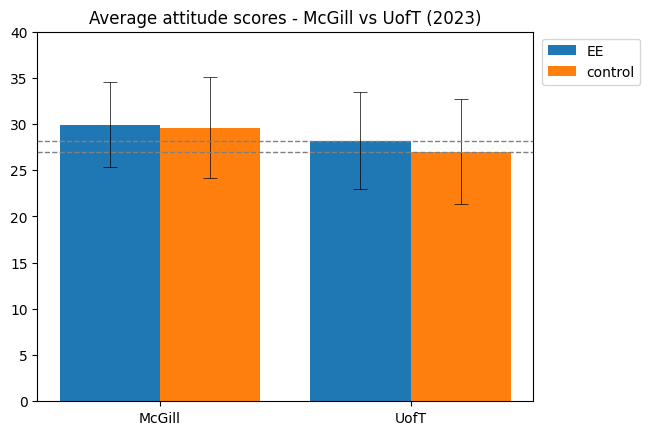

In [78]:
bar_width = 0.4
coords_mcgill = np.arange(2)
coords_uoft = [x + bar_width for x in coords_mcgill]

fig = plt.subplots()
plt.bar(coords_mcgill, [mcgill_ee_attitude_avg_2023, uoft_ee_attitude_avg_2023], width=bar_width, label="EE", yerr=[mcgill_ee_attitude_std_2023, uoft_ee_attitude_std_2023], capsize=5,
            error_kw={'elinewidth':0.5, 'capthick':0.5})
plt.bar(coords_uoft, [mcgill_cg_attitude_avg_2023, uoft_cg_attitude_avg_2023], width=bar_width, label="control",yerr=[mcgill_cg_attitude_std_2023, uoft_cg_attitude_std_2023], capsize=5,
            error_kw={'elinewidth':0.5, 'capthick':0.5})

plt.axhline(y=uoft_ee_attitude_avg_2023, linewidth=1, linestyle='dashed', color='grey')
plt.axhline(y=uoft_cg_attitude_avg_2023, linewidth=1, linestyle='dashed', color='grey')

plt.yticks(range(0, 41, 5))
plt.xticks(coords_mcgill + bar_width/2, ["McGill", "UofT"])
plt.title('Average attitude scores - McGill vs UofT (2023)')
plt.legend(loc='upper right', bbox_to_anchor=(1.23, 1))
plt.show()


Significant difference for attitudes at McGill

In [79]:
pg_stats = pg.ttest(mcgill_ee_attitude_data_2023.sum(axis=1), mcgill_cg_attitude_data_2023.sum(axis=1))
print(f"T-test for Attitude")
display(pg_stats)

T-test for Attitude


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.332282,104.887406,two-sided,0.74034,"[-1.61, 2.25]",0.063434,0.216,0.062063


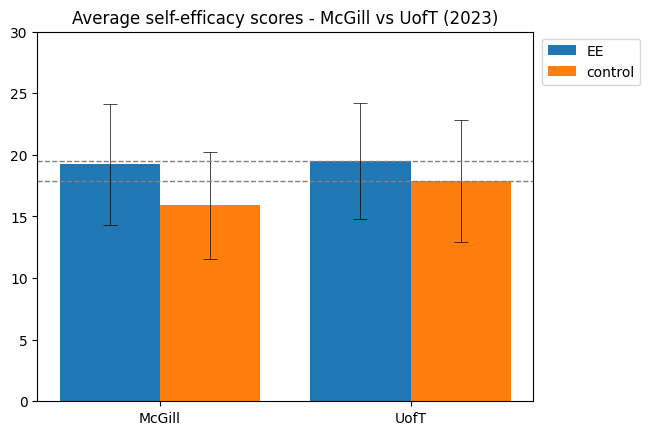

In [80]:
bar_width = 0.4
coords_mcgill = np.arange(2)
coords_uoft = [x + bar_width for x in coords_mcgill]

fig = plt.subplots()
plt.bar(coords_mcgill, [mcgill_ee_se_avg_2023, uoft_ee_se_avg_2023], width=bar_width, label="EE", yerr=[mcgill_ee_se_std_2023, uoft_ee_se_std_2023], capsize=5,
            error_kw={'elinewidth':0.5, 'capthick':0.5})
plt.bar(coords_uoft, [mcgill_cg_se_avg_2023, uoft_cg_se_avg_2023], width=bar_width, label="control",yerr=[mcgill_cg_se_std_2023, uoft_cg_se_std_2023], capsize=5,
            error_kw={'elinewidth':0.5, 'capthick':0.5})

plt.axhline(y=uoft_ee_se_avg_2023, linewidth=1, linestyle='dashed', color='grey')
plt.axhline(y=uoft_cg_se_avg_2023, linewidth=1, linestyle='dashed', color='grey')

plt.yticks(range(0, 31, 5))
plt.xticks(coords_mcgill + bar_width/2, ["McGill", "UofT"])
plt.title('Average self-efficacy scores - McGill vs UofT (2023)')
plt.legend(loc='upper right', bbox_to_anchor=(1.23, 1))
plt.show()


Significant difference for attitudes at McGill


In [82]:
pg_stats = pg.ttest(mcgill_ee_se_data_2023.sum(axis=1), mcgill_cg_se_data_2023.sum(axis=1))
print(f"T-test for Self-Efficacy")
display(pg_stats)

T-test for Self-Efficacy


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.687576,94.995329,two-sided,0.000377,"[1.55, 5.16]",0.7256,71.022,0.95895


## Self-assessment

c:\Users\Etomiuk\OneDrive\OneNote\EE_data_analysis\analysis-embedded-ethics\venv\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
c:\Users\Etomiuk\OneDrive\OneNote\EE_data_analysis\analysis-embedded-ethics\venv\Lib\site-packages\plot_likert\plot_likert.py:310: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses_to_first_question = responses_per_question[0]


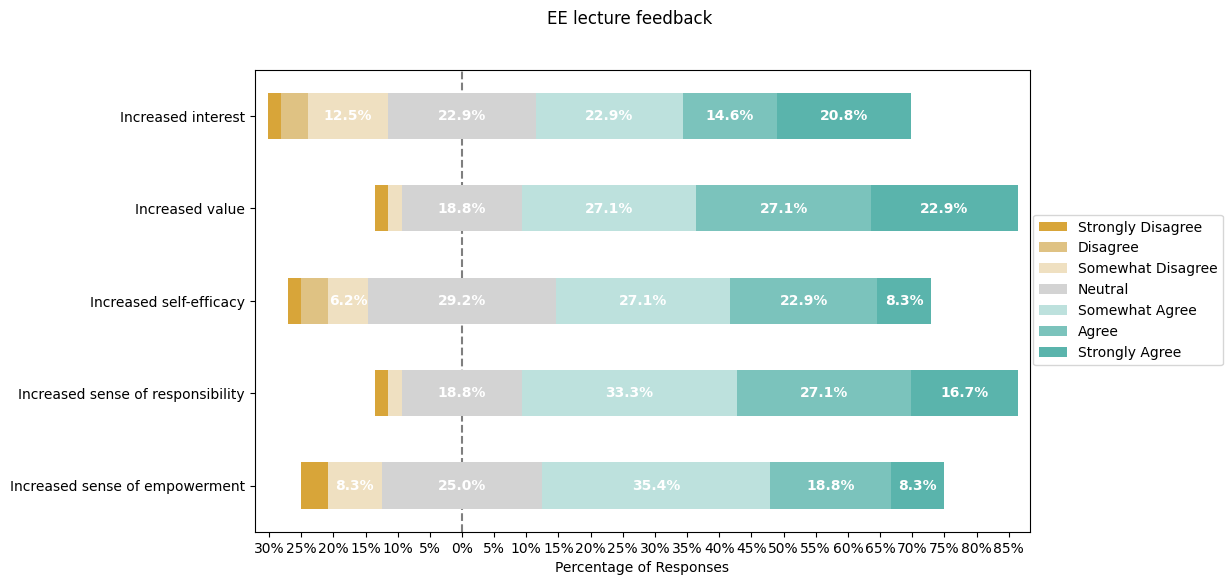

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6)) # draw two plots in one row, two columns

plot_likert.plot_likert(ee_data["Self-assessment"], likert, colors=plot_likert.colors.likert7, plot_percentage=True, bar_labels=True, legend=False, ax=ax)

fig.suptitle("EE lecture feedback")
'''
ax.set_yticklabels(["The Embedded Ethics lecture \nincreased my interest in \nlearning about ethics in \ncomputer science.",
                     "After the Embedded Ethics \nlecture, I believe more \nstrongly that all computer \nscientists should be aware \nof and able to analyze ethical \nissues arising from technology.",
                     "The Embedded Ethics lecture \nincreased my confidence \nin my ethical reasoning \nskils in computer science.",
                     "After the Embedded Ethics \nlecture, I believe more \nstrongly that computer scientists \nhave a shared responsibility \nto address ethical issues \narising from technology.",
                     "After the Embedded Ethics \nlecture, I feel more empowered \nto take steps to address \nissues arising from technology."][::-1])
'''
ax.set_yticklabels(["Increased interest",
                    "Increased value",
                    "Increased self-efficacy",
                    "Increased sense of responsibility",
                    "Increased sense of empowerment"][::-1])
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, likert_values, bbox_to_anchor=(1.1, 0.65))

Average attitude self-reflection score

In [ ]:
attitude_sr_avg = []
attitude_sr_std = []
for col in ee_data["Self-assessment"]:
    attitude_sr_avg.append(ee_data["Self-assessment"][col].mean())
    attitude_sr_std.append(ee_data["Self-assessment"][col].std())

In [ ]:
x_labels = ["Interest", "Value", "Self-efficacy", "Responsibility", "Empowerment"]
pd.DataFrame({"Average": attitude_sr_avg, "StdDev": attitude_sr_std}, index=x_labels)

,Average,StdDev
Interest,4.875000,1.565927
Value,5.416667,1.285489
Self-efficacy,4.770833,1.340682
Responsibility,5.291667,1.219667
Empowerment,4.770833,1.324717


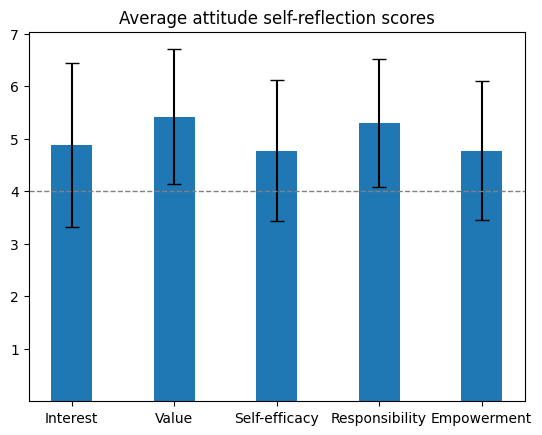

In [ ]:
bar_width = 0.4

fig = plt.subplots()
plt.bar(x_labels, attitude_sr_avg, yerr=attitude_sr_std, capsize=5, width=bar_width)
plt.axhline(y=4, linewidth=1, linestyle='dashed', color='grey')

plt.yticks(range(1, 8))
plt.title('Average attitude self-reflection scores')
plt.show()


Per course

In [ ]:
for col in ee_data["Self-assessment"]:
    f_stat, p_stat = stats.f_oneway(course_data["COMP251"]["Self-assessment"][col],
                                   course_data["COMP424"]["Self-assessment"][col],
                                   course_data["COMP551"]["Self-assessment"][col], 
                                   equal_var=False)
    print(f"ANOVA for {col}: f-statistic = {f_stat}, p-value = {p_stat}")

ANOVA for Q1: f-statistic = 0.07476100756976552, p-value = 0.9281758948833949
ANOVA for Q2: f-statistic = 1.142711663895845, p-value = 0.334861999487608
ANOVA for Q3: f-statistic = 1.3312621666530615, p-value = 0.28233087497419385
ANOVA for Q4: f-statistic = 0.23175683164234204, p-value = 0.7946714491256236
ANOVA for Q5: f-statistic = 1.349451403898168, p-value = 0.2778385981311271


Correlation between self-reflection questions

<Axes: >

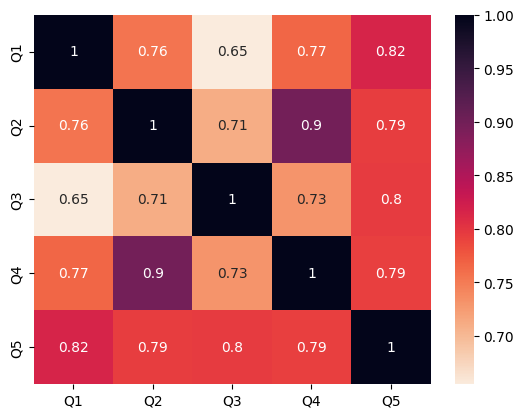

In [ ]:
corr_attitudes_sr = ee_data["Self-assessment"].corr()
sns.heatmap(corr_attitudes_sr, annot=True, cmap="rocket_r")